# MBA FIAP Inteligência Artificial & Machine Learning

## Visão Computacional: Análise de Imagens Médicas

## 1. Introdução

As tecnologias de imagens médicas estão cada vez mais integradas aos sitemas de visão computacional, incluindo as imagens de raio-x.

Modelos de equipamentos modernos geram imagens digitais deste tipo de exame, proporcionando análises mais completas e menos _ad-hoc_, com isso algumas pré-análises podem ser realizadas por aplicações baseadas em inteligência artificial para confirmar ou sugerir diagnósticos ao profissional responsável pelo exame.

No campo dos diagósticos por raios-x, a pnenumonia é uma das enfermidades onde seu uso é um dos mais aplicados para determinar o curso de tratamento.

<p align="center">
    <img src="imagens/NORMAL2-IM-1422-0001.jpeg">
</p>

## 2. Instruções

Este projeto final tem como objetivo explorar os conhecimentos adquiridos nas aulas práticas.

Por meio de uma trilha guiada, iremos constuir um modelo que seja capaz de classificar imagens de raio-x para determinar se a determinada pessoa está com alguma condição que necessita maiores cuidados.

De acordo com as imagens disponíveis para o treinamento e validação, será de critério do grupo selecionar as quantidades ideais ou até mesmo pré-processar as imagens para obter o melhor resultado, nos principais indicadores de performance, como precisão, sensibilidade e pontuação F1.

Este projeto poderá ser feita por grupos de até 4 pessoas.
Caso este projeto seja substitutivo, deverá ser realizado por apenas uma pessoa.

| Nome dos Integrantes     | RM            | Turma |
| :----------------------- | :------------- | :-----: |
| André Luiz de Mattos Junior | RM 339219   | `15IA` |
| Bruno Paiva de Oliveira     | RM 33802    | `15IA` |
| Felipe Cimadon              | RM 336927   | `15IA` |
| Kacio W. C. Oliveira        | RM 338206   | `15IA` |

Por ser um projeto guiado, fique atento quando houver as marcações **Implementação** indica que é necessário realizar alguma implementação em Python no bloco a seguir onde há a inscrição ```##IMPLEMENTAR``` e **Resposta** indica que é esperado uma resposta objetiva relacionado a algum questionamento. 

**Cada grupo pode utilizar nas respostas objetivas quaisquer itens necessários que enriqueçam seu ponto vista, como gráficos, fotos e, até mesmo, trechos de código-fonte.**

Pode-se utilizar quantos blocos forem necessários para realizar determinadas implementações ou utilizá-las para justificar as respostas. Não é obrigatório utilizar somente o bloco indicado.

Ao final não se esqueça de subir os arquivos do projeto nas contas do GitHub de cada membro, ou subir na do representante do grupo e os membros realizarem o fork do projeto.

A avaliação terá mais ênfase nos seguintes tópicos de desenvolvimento do projeto:
 
1. __Pré-Processamento__
2. __Classificação__
3. __Performance__
4. __Conclusões Finais__

## 3.1 Detalhe do problema: a pneunomia

Fonte: [artigo](https://drauziovarella.uol.com.br/doencas-e-sintomas/pneumonia) do Dr. Drauzio Varella.

Pneumonias são infecções que se instalam nos pulmões, órgãos duplos localizados um de cada lado da caixa torácica. Podem acometer a região dos alvéolos pulmonares onde desembocam as ramificações terminais dos brônquios e, às vezes, os interstícios (espaço entre um alvéolo e outro).

Basicamente, pneumonia é provocada pela penetração de um agente infeccioso ou irritante (bactérias, vírus, fungos e por reações alérgicas) no espaço alveolar, onde ocorre a troca gasosa. Esse local deve estar sempre muito limpo, livre de substâncias que possam impedir o contato do ar com o sangue.

Exame clínico, auscultação dos pulmões e radiografias de tórax são recursos essenciais para o diagnóstico de pneumonia.

<p align="center">
    <img src="imagens/pneumonia.jpeg">
</p>

## 3.2 Diagnóstico por raio-x

O exame de raio-x traz diferenças em cada tipo de diagnóstico, sendo considerado os seguintes grupos de análise: **normal** (ou controle) onde não há nenhuma condição de infeção, **bacterial pneumonia** (pneumonia bacteriana) que representa a condição de infecção bacteriana e **viral pneumonia** que indica a condição de infecção vira. 

<p align="center">
<img src="imagens/raiox.png" height="60%" width="60%">
</p>

As imagens de controle não são mais brancas ao centro que é onde fica o coração. Já nas imagens com pneumonia é possível notar regiões brancas ao redor dos pulmões, que é como o exame identifica as secreções responsáveis pela infeçcão.

Quando mais regiões brancas ao redor do pulmão mais severa é a inflamação e menos se observa dos detalhes dos pulmões, ficando um pouco esmaecido diante desta condição.

## 4.1 Problema

Construir um classificador utilizando _transfer learning_ para identificar as seguintes classes: **controle**, **pneumonia bacteriana** e **pneumonia viral**.

Para construir este classificador, utilize o dataset do [Kaggle Chest Ray Pneumonia](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia) e organize os dados de forma a separar em cada uma das classes que já estão definidas no diretório ```raiox```, sendo ```controle``` para as imagens normais (sem inflamação), ```bacteria``` para as imagens de pneumonia bacteriana e ```viral``` para as imagens de pneumonia viral.

Determine a quantidade de imagens a serem treinadas e validadas. Utiliza pelo menos, 100 imagens para cada classe.

Compare os resultados com pelo menos 3 classificadores, obtendo os valores de **precisão (precision)**, **sensibilidade (recall)** e **pontuação F1 (F1 Score)**. No guia abaixo, foi indicado os seguintes modelos: ResNet50, VGG16 e VGG19. 

>Importante: a escolha do número de imagens devem ser o suficiente para alcançar o valor de **precisão** mínima de 70%.

A construção do modelo será utilizada o framework Keras.

**Pergunta**: Qual o número de imagens que foram selecionadas para cada classe?

**Resposta: Foram selecionadas: 929


## 4.2 Componentes obrigatórios

Este projeto requer a instalação dos seguintes componentes, via ```conda install```:

* Keras
* Tensorflow
* Pillow
* Matplotlib

In [10]:
import os

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline

import keras
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50
from keras.applications import VGG16, VGG19
from keras.applications import Xception
from keras.applications.xception import preprocess_input
from keras.applications.resnet50 import preprocess_input
from keras.applications.vgg16 import preprocess_input
from keras import Model, layers
from keras.models import load_model, model_from_json
from keras.utils import to_categorical
import pathlib

import keras.backend as K
import cv2
import glob
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from os import listdir, walk
from os.path import isfile, join

#### Pré-processamento

Inicialmente, checaremos a dimensão das imagens, já que este é um fator determinante na perfomance do nosso classficador e no processamento do modelo.

In [73]:
os.listdir(path='./Imagens_kaggle')

def getListOfFiles(dirName):
    # create a list of file and sub directories 
    # names in the given directory 
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            if entry.endswith(".jpeg"):
                allFiles.append(fullPath)
                
    return allFiles

files = getListOfFiles("./Imagens_kaggle/")

In [74]:
def retorna_classificacao(files):
    classificacao = []
    for file in files:
        tipo = ''
        controle = os.path.dirname(file).split("\\")[-1].lower()
        if controle == "pneumonia":
            controle = os.path.basename(file).split('_')[1]
            if controle == "virus":
                controle = "viral"
            elif controle == "bacteria":
                controle = 'bacteria'
        else:
            controle = "controle"
        classificacao.append(controle)
    return classificacao

In [75]:
classificacao = retorna_classificacao(files)
altura = []
comprimento = []
for file in files:
    imagem = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    altura.append(imagem.shape[0])
    comprimento.append(imagem.shape[1])
df = pd.DataFrame({'altura': altura, 'comprimento': comprimento, 'arquivo': files, 'classificacao': classificacao})

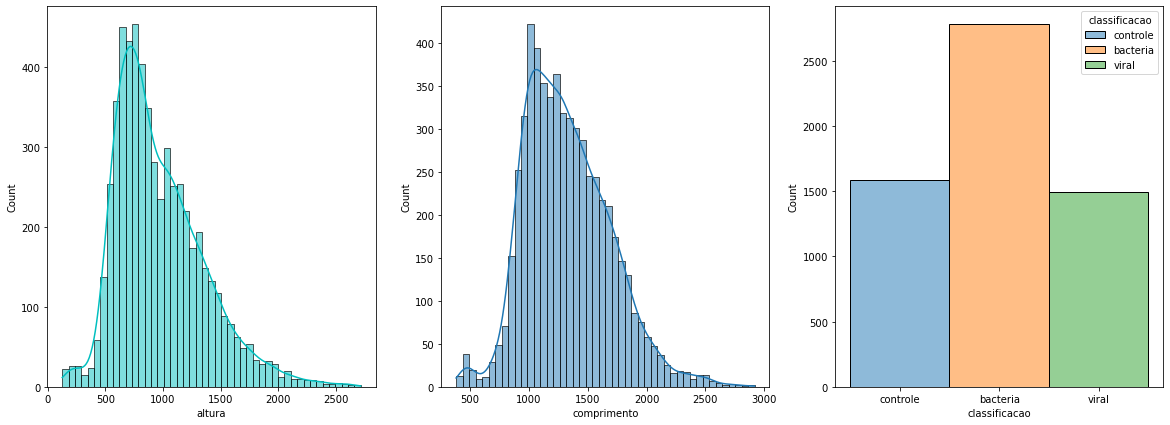

In [76]:
fig, axs = plt.subplots(1, 3, figsize=(20, 7))
sns.histplot(data=df, x="altura", kde=True, ax=axs[0],  color="c")
sns.histplot(data=df, x="comprimento", kde=True,ax=axs[1], palette="ch:.25")
sns.histplot(data=df, x="classificacao", discrete= True,ax=axs[2], hue='classificacao')
plt.show()

In [77]:
df = pd.DataFrame({'altura': altura, 'comprimento': comprimento, 'arquivo': files, 'classificacao': classificacao})

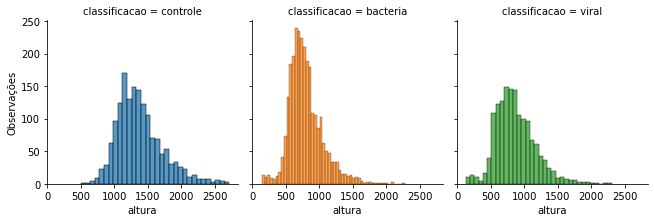

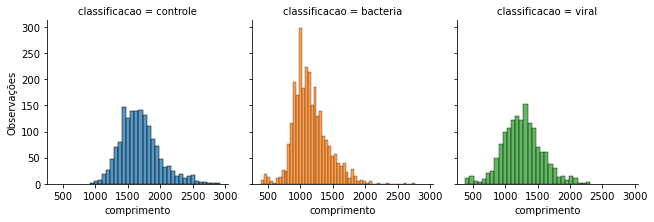

In [78]:
g = sns.FacetGrid(df, col="classificacao", hue="classificacao")
g.map_dataframe(sns.histplot, x="altura")
g.set_axis_labels("altura", "Observações")
s = sns.FacetGrid(df, col="classificacao", hue="classificacao")
s.map_dataframe(sns.histplot, x="comprimento")
s.set_axis_labels("comprimento", "Observações")

In [79]:
df[['altura', 'comprimento']].describe()

,altura,comprimento
count,5856.000000,5856.000000
mean,970.689037,1327.880806
std,383.392117,363.500922
min,127.000000,384.000000
25%,688.000000,1056.000000
50%,888.000000,1281.000000
75%,1187.000000,1560.000000
max,2713.000000,2916.000000


Observamos uma grande dispersão nos comprimentos e alturas das imagens. Incialmente, selecionaremos as imagens com altura 600-1150 e comprimento 1000-1400

In [80]:
df[(df['comprimento'] >= 1000) & (df['comprimento']<=2000) & (df['altura']<=1400) & (df['altura'] >=600)].groupby(['classificacao'], as_index=False).size()

,classificacao,size
0,bacteria,1831
1,controle,936
2,viral,1106


In [87]:
df['selecionado'] = df[['altura', 'comprimento']].apply(lambda x: 1 if ((x['comprimento'] > 1000) & (x['comprimento'] < 2000) & (x['altura']>=600) & (x['altura']<=1400)) else 0, axis=1)
df_normal = df[(df['selecionado'] == 1) & (df['classificacao'] == 'controle')][1:930]
df_bacteriana = df[(df['selecionado'] == 1) & (df['classificacao'] == 'bacteria')][1:930]
df_virus = df[(df['selecionado'] == 1) & (df['classificacao'] == 'viral')][1:930]
df_selecao = pd.concat([df_normal, df_bacteriana, df_virus])

In [117]:
df_selecao.groupby(['classificacao'], as_index=False).size()

,classificacao,size
0,bacteria,929
1,controle,929
2,viral,929


Antes de treinarmos os modelos, faremos o redimensionamento da imagem, processo de suavização gaussiana da imagem e limiarização invertida

In [89]:
# Criação de diretório para salvar as imagens
! mkdir raiox\train\controle
! mkdir raiox\train\bacteria
! mkdir raiox\train\viral

J  existe uma subpasta ou um arquivo raiox\train\controle.
J  existe uma subpasta ou um arquivo raiox\train\bacteria.
J  existe uma subpasta ou um arquivo raiox\train\viral.


In [90]:
def ajuste_imagem(file, classificacao):
    imagem = cv2.imread(file)
    # Lendo o arquivo em escala de cinza para aplicação da limiarização invertida
    imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
    imagem = cv2.resize(imagem, (128, 128))
    imagem_suave_gaussian = cv2.GaussianBlur(imagem, (15, 15), 0)
    imagem_limiarizada = cv2.adaptiveThreshold(imagem_suave_gaussian, 127, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    cv2.imwrite("./raiox/train/" + classificacao + "/" + str(os.path.basename(file)), imagem_limiarizada)



In [91]:
for x, y in zip(df_selecao['arquivo'].tolist(), df_selecao['classificacao'].tolist()):
    ajuste_imagem(x,y)

In [92]:
# Gerando os objetos para treino
labels = df_selecao['classificacao'].tolist()
classificacao = df_selecao['classificacao'].tolist()
data = []
arquivos = df_selecao['arquivo'].tolist() 
for x, y in zip(arquivos, classificacao):
    data.append(ajuste_imagem(x, y))
data = np.array(data)
labels = np.array(labels)

# Aplicando o one-hot encoding para os rótulos
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

## 4.3 Carregando imagens de treinamento e validação

Selecione a melhor divisão entre dados de treinamento e validação. O número deverá ser representado em número fracionário, 5% equivale a 0.05, por exemplo.}

In [93]:
## IMPLEMENTE
divisao_treino_validacao = 0.30
#(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=divisao_treino_validacao, stratify=labels, random_state=42)

In [94]:
train_datagen = ImageDataGenerator(
    shear_range=10,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=preprocess_input,
    validation_split=divisao_treino_validacao
)
train_generator = train_datagen.flow_from_directory(
    "./raiox/train/",
    batch_size=32,
    class_mode="categorical",
    color_mode="rgb",
    target_size=(224,224),
    subset="training")

Found 2202 images belonging to 3 classes.


In [95]:
val_generator = train_datagen.flow_from_directory(
    "./raiox/train/",
    batch_size=32,
    class_mode="categorical",
    color_mode="rgb",
    target_size=(224,224),
    subset="validation")

Found 941 images belonging to 3 classes.


In [96]:
train_generator.class_indices, val_generator.class_indices

({'bacteria': 0, 'controle': 1, 'viral': 2},
 {'bacteria': 0, 'controle': 1, 'viral': 2})

## 4.4 Modelos de transfer learning

O Keras já possui classes especializadas para os seguintes modelos de deep-learning treinados com o conjunto de dados [ImageNet](http://www.image-net.org/):
  
* Xception
* VGG16
* VGG19
* ResNet50
* InceptionV3
* InceptionResNetV2
* MobileNet
* DenseNet
* NASNet
* MobileNetV2

Mais detalhes, veja na [documentação do Keras](https://keras.io/applications/).

Para este estudo, vamos utilizar para avaliação as seguintes arquiteturas: RestNet50, VGG15 e VGG19.

## 4.5 Indicadores de desempenho

O Keras não possui os indicadores de desempenho como precisão, sensibilidade e pontuação f1 por padrão, portanto precisamos implementar externamente.

In [97]:
def recall_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

### 4.5.1 Arquitetura ResNet50

**Pergunta**: Explique como é constituída a arquitetura do ResNet50? *Utilize, se necessário, gráficos, projetos que utilizam essa arquitetura. Detalhe também sua topologia em camadas e mostre quais as situações essa arquitetura pode ter mais êxito e quais cenários não tem.*

**Resposta**:**Resposta**:
    A ResNet50 é uma variação da ResNet, Residual Network, que possui 50 camadas convulacionais, que é de onde vem o número 50 do nome.
    Essa arquitetura é muito utilizada em tarefas de visão computacional como classificação de imagem, localização de objetos, detecção de objetos, etc.
    
    Abaixo segue imagem ilustrando as camadas da ResNet50:



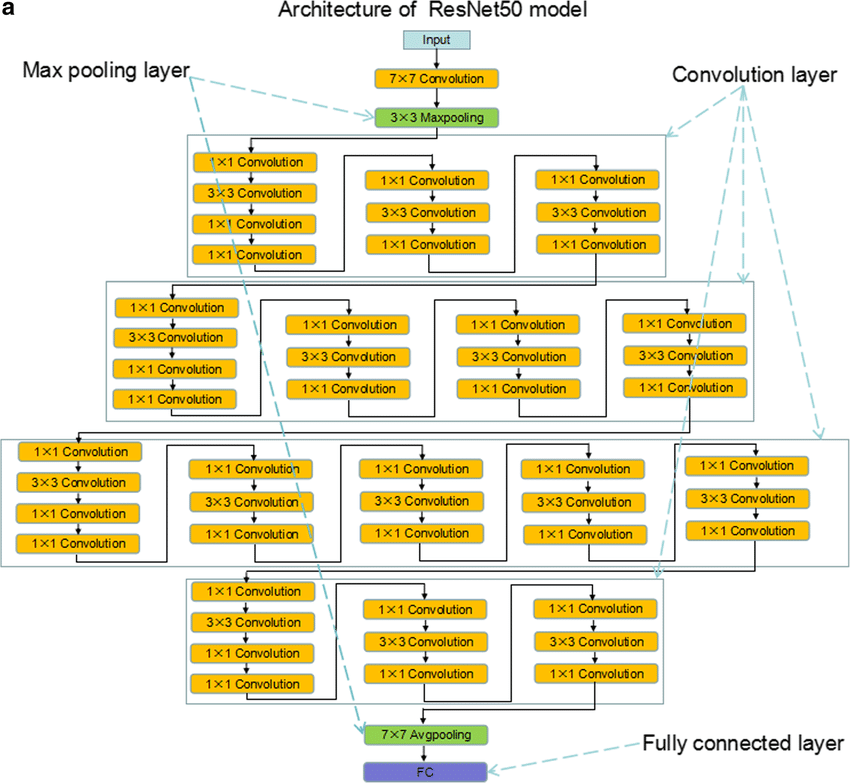

In [98]:
from IPython.display import Image
Image('./imagens/The-architecture-of-ResNet50-and-deep-learning-model-flowchart-a-b-Architecture-of.jpg',width=900, height=1000)

A técnica de transfer learning consiste de utilizar o mesmo modelo e treiná-lo para outas imagens. Por tal motivo, excluímos a última camada para modelar com as classes que definimos, ou seja, **controle**, **bacteriana** e **viral**.

Informe a quantidade de classes a serem classificadas.

In [99]:
## IMPLEMENTE
qtde_classes = 3

In [100]:
conv_base = ResNet50(include_top=False)

for layer in conv_base.layers:
    layer.trainable = False

In [101]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [102]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

O número de épocas define quantas vezes o modelo irá treinar e validar o erro, assim ajustando os pesos para melhor convergência.
Escolha o número adequado de épocas para alcançarmos pelo menos **70% de precisão de validação**.

In [103]:
## IMPLEMENTE
qtde_epocas = 30

In [104]:
history = model.fit_generator(generator=train_generator, 
                              epochs=qtde_epocas, 
                              validation_steps=5, 
                              steps_per_epoch=5, 
                              validation_data=val_generator)

C:\Users\Kacio\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
5/5 [==============================] - 17s 3s/step - loss: 1.7928 - precision_score: 0.4414 - recall_score: 0.3104 - f1_score: 0.3495 - val_loss: 1.1972 - val_precision_score: 0.4859 - val_recall_score: 0.3875 - val_f1_score: 0.4299
Epoch 2/30
5/5 [==============================] - 12s 3s/step - loss: 1.2647 - precision_score: 0.4583 - recall_score: 0.3783 - f1_score: 0.4136 - val_loss: 1.0942 - val_precision_score: 0.5273 - val_recall_score: 0.4000 - val_f1_score: 0.4534
Epoch 3/30
5/5 [==============================] - 12s 3s/step - loss: 1.2293 - precision_score: 0.5018 - recall_score: 0.3793 - f1_score: 0.4314 - val_loss: 0.9250 - val_precision_score: 0.6440 - val_recall_score: 0.4938 - val_f1_score: 0.5572
Epoch 4/30
5/5 [==============================] - 12s 3s/step - loss: 0.9457 - precision_score: 0.6752 - recall_score: 0.4783 - f1_score: 0.5595 - val_loss: 1.0526 - val_precision_score: 0.5813 - val_recall_score: 0.4313 - val_f1_score: 0.4937
Epoch 5/30
5/5 [========

Um modelo que converge bem possui o gráfico de perda (*loss*) descendente e os gráfico de precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*) em acendente.

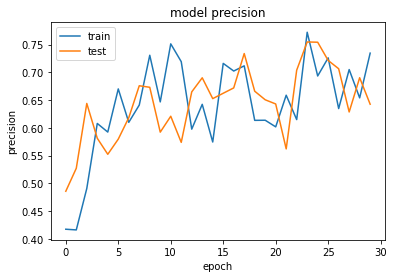

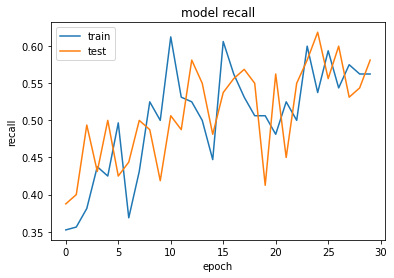

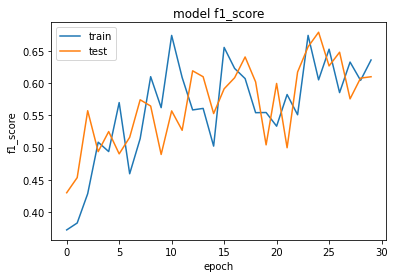

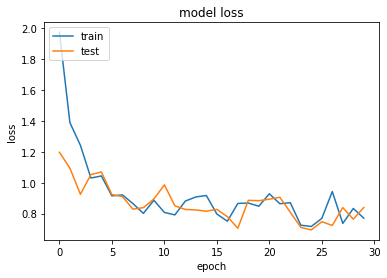

In [105]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Pergunta**: Avalie os gráficos de perda (*loss*), precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*)  e explique o comportamento de ambos no que tange a convergência do modelo.

**Resposta**:O indicativo que o modelo está convergindo é quando a precisão, sensibilidade e f1 score tem comportamento crescente. Já a perda, conforme as épocas são executadas, ele apresenta valor decrescente, aproximando-se cada vez mais de zero.

**Pergunta**: Quais são os valores de **precisão (precision)**, **sensibilidade (recall)** de validação? 

*Estes valores são exibidos durante o treinamento, utilize a última saída, exemplo:*

```
Epoch 10/10 [==============================] - 45s 9s/step - loss: 0.1234 - precision_score: 0.9742 - recall_score: 0.9683 - f1_score: 0.9712 - val_loss: 0.8819 - val_precision_score: 0.6912 - val_recall_score: 0.5649 - val_f1_score: 0.6216```

No caso acima, o valor de precisão, sensibilidade e pontuação de validação são, respectivamente, 69,12%, 56,49% e 62,16%.

**Resposta**: val_precision_score : 64,26%, val_recall_score : 58,13% , val_f1_score : 61,00%

### 4.5.2 Arquitetura VGG16

**Pergunta**: Explique como é constituída a arquitetura do VGG16? *Utilize, se necessário, gráficos, projetos que utilizam essa arquitetura. Detalhe também sua topologia em camadas e mostre quais as situações essa arquitetura pode ter mais êxito e quais cenários não tem.*

**Resposta**:A VGG 16 é uma rede neural convulucional proposta por pesquisadores da Universidade de Oxford. Considerando o dataset da ImageNet, o modelo atinge precisão de 92,7% nos top5 testes efetuados. Ela é composta pela sequencialmente pelas seguintes camadas:
- 2 Camadas Convolucionais
- 1 de Pooling
- 2 Camadas Convolucionais
- 1 de pooling
- 3 camadas convolucionais
- 1 de Pooling
- 3 camadas convolucionais
- 1 de Pooling
- 3 camadas convolucionais
- 1 de Pooling
- 3 camadas densas
São conhecidos alguns inconvenientes da VGG16. Entre eles:
- Lentidão para treinamento
- A arquitetura dos pesos é muito extensa, o que pode gerar problemas de memória

Abaixo segue imagem para exemplificar a arquitetura:

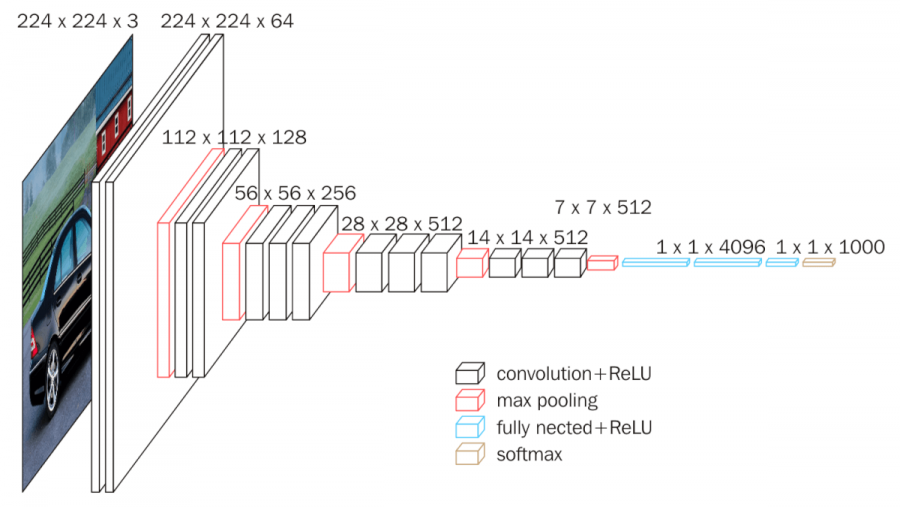

In [106]:
Image('./imagens/vgg16.png',width=900, height=1000)

In [107]:
conv_base = VGG16(include_top=False)

for layer in conv_base.layers:
    layer.trainable = False

In [108]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0   

In [109]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

In [110]:
history = model.fit_generator(generator=train_generator, 
                              epochs=qtde_epocas, 
                              validation_steps=5, 
                              steps_per_epoch=5, 
                              validation_data=val_generator)

Epoch 1/30
5/5 [==============================] - 28s 6s/step - loss: 1.4522 - precision_score: 0.4443 - recall_score: 0.3879 - f1_score: 0.4138 - val_loss: 1.4747 - val_precision_score: 0.3791 - val_recall_score: 0.3187 - val_f1_score: 0.3461
Epoch 2/30
5/5 [==============================] - 28s 6s/step - loss: 1.4893 - precision_score: 0.3131 - recall_score: 0.2411 - f1_score: 0.2716 - val_loss: 1.2093 - val_precision_score: 0.4834 - val_recall_score: 0.3875 - val_f1_score: 0.4296
Epoch 3/30
5/5 [==============================] - 29s 6s/step - loss: 1.2791 - precision_score: 0.4310 - recall_score: 0.3508 - f1_score: 0.3866 - val_loss: 1.0910 - val_precision_score: 0.4736 - val_recall_score: 0.3250 - val_f1_score: 0.3841
Epoch 4/30
5/5 [==============================] - 28s 6s/step - loss: 1.0959 - precision_score: 0.4874 - recall_score: 0.3600 - f1_score: 0.4140 - val_loss: 1.2109 - val_precision_score: 0.4731 - val_recall_score: 0.3750 - val_f1_score: 0.4165
Epoch 5/30
5/5 [========

Um modelo que converge bem possui o gráfico de perda (*loss*) descendente e os gráfico de precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*) em acendente.

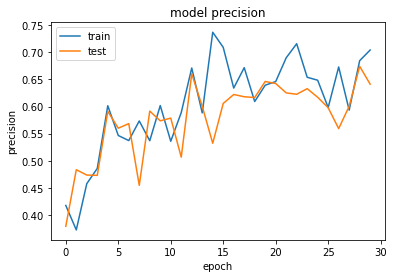

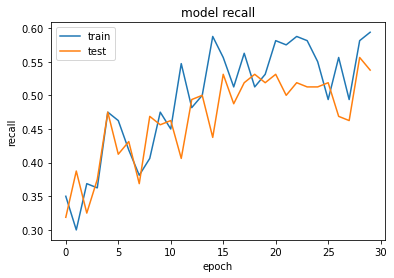

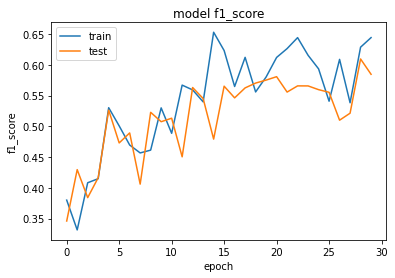

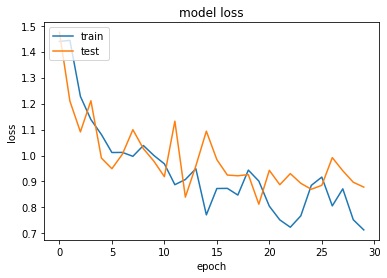

In [111]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Pergunta**: Avalie os gráficos de perda (*loss*), precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*)  e explique o comportamento de ambos no que tange a convergência do modelo.

**Resposta**:O indicativo que o modelo está convergindo é quando a precisão, sensibilidade e f1 score tem comportamento crescente. Já a perda, conforme as épocas são executadas, ele apresenta valor decrescente, aproximando-se cada vez mais de zero.

**Pergunta**: Quais são os valores de **precisão (precision)**, **sensibilidade (recall)** de validação? 

*Estes valores são exibidos durante o treinamento, utilize a última saída, exemplo:*

```
Epoch 10/10 [==============================] - 45s 9s/step - loss: 0.1234 - precision_score: 0.9742 - recall_score: 0.9683 - f1_score: 0.9712 - val_loss: 0.8819 - val_precision_score: 0.6912 - val_recall_score: 0.5649 - val_f1_score: 0.6216```

No caso acima, o valor de precisão, sensibilidade e pontuação de validação são, respectivamente, 69,12%, 56,49% e 62,16%.

 **Resposta**:val_precision_score : 64,13%, val_recall_score: 53,75%, val_f1_score : 58,45%

### 4.5.3 Arquitetura VGG19

**Pergunta**: Explique como é constituída a arquitetura do VGG19? *Utilize, se necessário, gráficos, projetos que utilizam essa arquitetura. Detalhe também sua topologia em camadas e mostre quais as situações essa arquitetura pode ter mais êxito e quais cenários não tem.*

**Resposta**:
A VGG Net é uma das redes mais influentes porque reforçou a noção de que as CNNs precisam ter uma rede profunda de camadas para que essa representação de dados visuais possa funcionar melhor.
VGG19 é composto por 16 camadas convolucionais (com 5 camadas de pooling) e 3 camadas totalmente conectadas somando as 19 camadas. 
Para reduzir o número de parâmetros, é usado pequenos filtros 3 × 3 em todas as camadas convolucionais e é melhor a ser utilizado com sua taxa de erro de 7,3%.

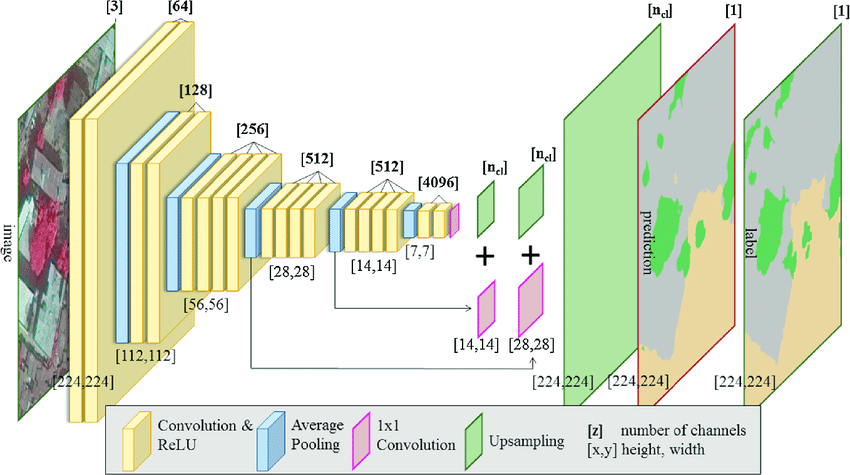

In [112]:
Image('./imagens/vgg19.png',width=900, height=1000)

In [113]:
conv_base = VGG19(include_top=False)

for layer in conv_base.layers:
    layer.trainable = False

In [114]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0   

In [115]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

In [116]:
history = model.fit_generator(generator=train_generator, 
                              epochs=qtde_epocas, 
                              validation_steps=5, 
                              steps_per_epoch=5, 
                              validation_data=val_generator)

Epoch 1/30
5/5 [==============================] - 35s 8s/step - loss: 2.1233 - precision_score: 0.3822 - recall_score: 0.3623 - f1_score: 0.3718 - val_loss: 1.7841 - val_precision_score: 0.3649 - val_recall_score: 0.3250 - val_f1_score: 0.3431
Epoch 2/30
5/5 [==============================] - 34s 8s/step - loss: 1.6290 - precision_score: 0.4005 - recall_score: 0.3634 - f1_score: 0.3809 - val_loss: 1.3248 - val_precision_score: 0.4437 - val_recall_score: 0.2937 - val_f1_score: 0.3515
Epoch 3/30
5/5 [==============================] - 33s 7s/step - loss: 1.3437 - precision_score: 0.3668 - recall_score: 0.2793 - f1_score: 0.3170 - val_loss: 1.1320 - val_precision_score: 0.5216 - val_recall_score: 0.4313 - val_f1_score: 0.4718
Epoch 4/30
5/5 [==============================] - 33s 7s/step - loss: 1.1201 - precision_score: 0.4465 - recall_score: 0.3481 - f1_score: 0.3903 - val_loss: 1.3838 - val_precision_score: 0.3886 - val_recall_score: 0.3063 - val_f1_score: 0.3425
Epoch 5/30
5/5 [========

Um modelo que converge bem possui o gráfico de perda (*loss*) descendente e os gráfico de precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*) em acendente.

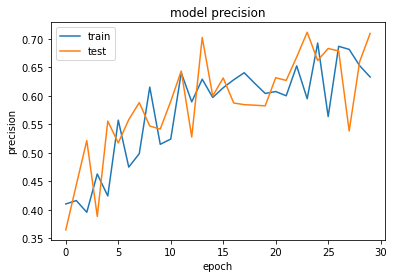

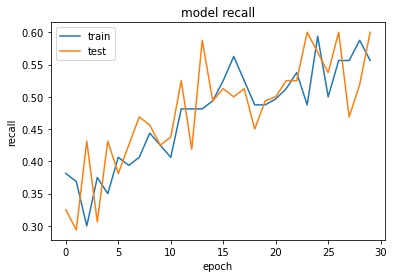

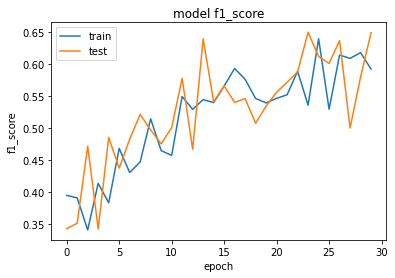

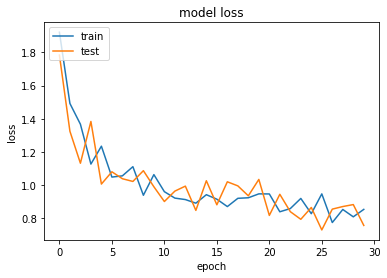

In [118]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Pergunta**: Avalie os gráficos de perda (*loss*), precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*)  e explique o comportamento de ambos no que tange a convergência do modelo.

**Resposta**:O indicativo que o modelo está convergindo é quando a precisão, sensibilidade e f1 score tem comportamento crescente. Já a perda, conforme as épocas são executadas, ele apresenta valor decrescente, aproximando-se cada vez mais de zero.

**Pergunta**: Quais são os valores de **precisão (precision)**, **sensibilidade (recall)** de validação? 

*Estes valores são exibidos durante o treinamento, utilize a última saída, exemplo:*

```
Epoch 10/10 [==============================] - 45s 9s/step - loss: 0.1234 - precision_score: 0.9742 - recall_score: 0.9683 - f1_score: 0.9712 - val_loss: 0.8819 - val_precision_score: 0.6912 - val_recall_score: 0.5649 - val_f1_score: 0.6216```

No caso acima, o valor de precisão, sensibilidade e pontuação de validação são, respectivamente, 69,12%, 56,49% e 62,16%.

**Resposta**: val_precision_score: 70,96% , val_recall_score: 60,00% , val_f1_score: 64,87%

## 4.6 Compartivo de arquiteturas

Preencha a tabela abaixo com os valores dos indicadores de performance apresentados.

_O cálculo do F1-Score é dado por 2 * (Precisão * Sensibilidade) / (Precisão + Sensibilidade)._

| Modelo   | Precisão (*Precision*) | Sensibilidade (*Recall*) | F1-Score |
|----------|----------|---------------|----------|
| ResNet50 | 64,26 %     | 58,13 %          | 61,00 %     |
| VGG16    | 64,13 %     | 53,75 %          | 58,45 %     |
| VGG19    | 70,96 %     | 60,00 %          | 64,87 %     |

## 4.7 Conclusões

Analise os resultados da tabela de indicadores do comparativo de arquiteturas e explique os principais motivos pelos quais cada modelo obteve cada resultado.


**Respota**:
A arquitetura que apresentou o melhor resultado foi a VGG19, isso se da devido a sua maior quantidade de camadas e parametros o que leva a uma menor diferença entre o valor observado e o real (loss).

## 4.8 Abordagem Extra

Considerando os outros classificadores, escolha outro que ainda não foi utilizado, implemente abaixo. Ao final compare os resultados e explique os resultados.

_Não se esquece de utilizar as importações adequadas para cada modelo.
A forma de implementação deve respeitar as mesmas condições como valor de split e quantidade de imagens para poder comparar os modelos._

In [119]:
#IMPLEMENTE
conv_base = Xception(include_top=False)

for layer in conv_base.layers:
    layer.trainable = False

83689472/83683744 [==============================] - 4s 0us/step


In [120]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

In [121]:
predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)
model.summary()


Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_7[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [122]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

In [123]:
history = model.fit_generator(generator=train_generator, 
                              epochs=qtde_epocas, 
                              validation_steps=5, 
                              steps_per_epoch=5, 
                              validation_data=val_generator)

C:\Users\Kacio\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
5/5 [==============================] - 18s 3s/step - loss: 4.3721 - precision_score: 0.3394 - recall_score: 0.3379 - f1_score: 0.3387 - val_loss: 1.4985 - val_precision_score: 0.4850 - val_recall_score: 0.4563 - val_f1_score: 0.4701
Epoch 2/30
5/5 [==============================] - 14s 3s/step - loss: 2.1149 - precision_score: 0.4244 - recall_score: 0.3918 - f1_score: 0.4073 - val_loss: 1.6487 - val_precision_score: 0.4717 - val_recall_score: 0.4437 - val_f1_score: 0.4570
Epoch 3/30
5/5 [==============================] - 13s 3s/step - loss: 1.6791 - precision_score: 0.4309 - recall_score: 0.4036 - f1_score: 0.4165 - val_loss: 2.1807 - val_precision_score: 0.4472 - val_recall_score: 0.4125 - val_f1_score: 0.4288
Epoch 4/30
5/5 [==============================] - 14s 3s/step - loss: 2.4970 - precision_score: 0.3214 - recall_score: 0.3056 - f1_score: 0.3132 - val_loss: 1.8627 - val_precision_score: 0.5416 - val_recall_score: 0.5312 - val_f1_score: 0.5363
Epoch 5/30
5/5 [========

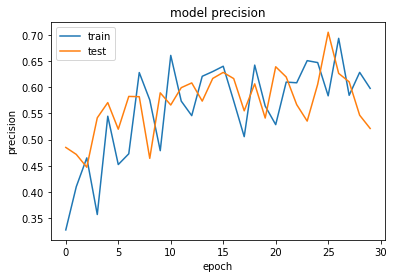

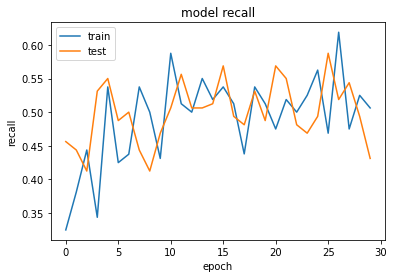

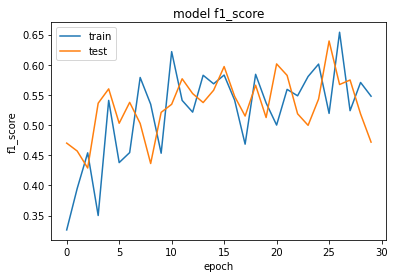

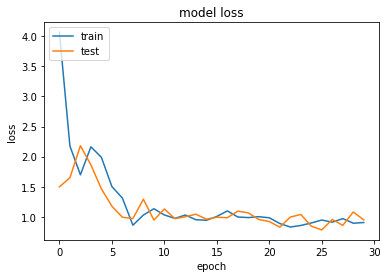

In [124]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 4.8.1 Conclusões sobre a abordagem extra

Como seu modelo performou em comparação com os demais modelos anteriores? Justifique sua resposta levando em consideração a arquitetura respectiva.

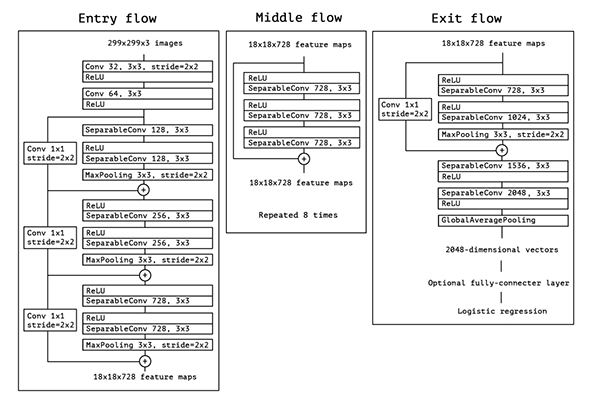

In [125]:
#Imagem representando arquitetura Xception
Image('./imagens/imagenet_xception_flow.png',width=900, height=1000)

**Resposta**:

Na abprdagem extra, utilizamos a arquitetura Xception, criada por Francois Chollet, o mantenedor-chefe da biblioteca da Keras. Ela possui 36 camadas convolucionais para extração de características. Entretanto, quando comparada as redes já testadas anteriormente, gera menos características. A precisão gerada por ela foi muito abaixo das demais, mesmo considerando que sua profundidade é de 126 versus 23 e 26 respectivamente para VGG16 e VGG19. 